In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Load data
otus_data = pd.read_csv('data_normalized.csv',sep=',',index_col=0)
metadata = pd.read_csv('P8_C_F.csv',sep=',',index_col=0)
otus_data.head(10)

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
Lactobacillus,8.897736e+06,8.567618e+06,8.742705e+06,2.759672e+05,6.973386e+05,2.561120e+05,8.943864e+06,8.768577e+06,1.449831e+06,5.038006e+05,...,5.294519e+06,7.169531e+06,6.686188e+06,5.306953e+06,3.559897e+06,7.753555e+05,5.392391e+06,5.250797e+06,8.060608e+06,7.510279e+06
Escherichia_Shigella,1.444014e+04,1.423959e+04,7.019514e+03,8.793847e+06,7.525722e+06,7.659895e+06,1.421953e+05,6.618399e+03,7.227492e+06,7.914201e+06,...,4.294138e+06,1.897475e+06,2.988709e+06,4.332845e+06,5.436514e+06,8.336977e+06,4.162773e+06,4.361726e+06,5.597561e+05,1.748060e+06
Muribacter,1.642566e+05,1.349752e+05,1.772929e+05,8.022302e+03,2.843906e+05,8.343194e+04,1.464070e+05,2.761677e+05,4.432322e+04,2.202122e+05,...,3.850705e+04,8.423417e+04,4.773270e+04,3.409478e+04,8.824532e+03,1.925352e+04,6.959347e+04,7.440685e+04,3.210926e+05,1.564349e+05
Staphylococcus,1.772929e+05,4.336054e+05,3.461623e+05,1.427970e+05,8.575841e+05,7.300295e+04,8.022302e+02,1.002788e+03,7.364473e+05,1.007200e+06,...,2.607248e+03,3.610036e+03,4.011151e+03,2.807806e+03,2.787750e+04,9.827320e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Streptococcus,5.653717e+05,5.900403e+05,5.286697e+05,5.415054e+03,6.137061e+04,2.386635e+04,5.633662e+05,7.573053e+05,2.547081e+04,9.907543e+04,...,2.264295e+05,2.859951e+05,1.768918e+05,2.097832e+05,1.929364e+05,7.681354e+04,2.360562e+05,2.200116e+05,8.792443e+05,4.207697e+05
Enterococcus,1.062955e+04,2.807806e+03,1.403903e+03,1.283568e+04,8.423417e+03,3.228977e+04,2.607248e+03,3.610036e+03,8.824532e+03,5.615611e+03,...,2.607248e+03,4.011151e+03,5.415054e+03,1.584405e+04,1.042899e+04,4.612824e+03,1.604460e+03,2.206133e+03,1.403903e+03,3.208921e+03
Pseudomonas,0.000000e+00,2.005575e+02,2.005575e+02,0.000000e+00,0.000000e+00,3.208921e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.604460e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,2.005575e+02,4.011151e+02,1.203345e+03,0.000000e+00,8.022302e+02,2.005575e+02,0.000000e+00
Lachnospiraceae_NK4A136_group,4.612824e+03,1.343736e+04,1.403903e+04,3.971039e+04,3.088586e+04,1.079000e+05,8.824532e+03,1.183290e+04,2.767694e+04,1.383847e+04,...,7.621187e+03,2.908084e+04,5.013939e+03,5.615611e+03,4.652935e+04,4.672991e+04,9.025090e+03,1.604460e+03,1.243457e+04,8.824532e+03
Muribaculaceae,3.228977e+04,5.856280e+04,3.329255e+04,1.961453e+05,1.379836e+05,4.362127e+05,4.793325e+04,4.211709e+04,1.472092e+05,7.139849e+04,...,3.770482e+04,1.367802e+05,2.065743e+04,2.266300e+04,1.937386e+05,1.867191e+05,2.527025e+04,2.105854e+04,5.134273e+04,4.652935e+04
Lachnospiraceae,1.805018e+03,4.612824e+03,4.011151e+03,2.065743e+04,9.225647e+03,4.973827e+04,5.013939e+03,3.610036e+03,7.019514e+03,4.612824e+03,...,2.206133e+03,1.083011e+04,1.805018e+03,2.005575e+03,1.805018e+04,2.446802e+04,2.206133e+03,1.805018e+03,3.008363e+03,1.805018e+03


In [28]:
metadata.head(10)
new_meta_index = []
for index1 in metadata.index:
    new_meta_index.append(str(index1))
metadata.index = new_meta_index
metadata = metadata.sort_values(by='Experiment')
metadata['Experiment']

1     C
47    C
46    C
43    C
42    C
41    C
40    C
30    C
48    C
24    C
23    C
22    C
15    C
25    C
49    C
2     C
3     C
8     C
13    C
11    C
14    C
7     C
36    F
37    F
38    F
5     F
6     F
4     F
44    F
45    F
39    F
35    F
16    F
33    F
31    F
29    F
28    F
27    F
26    F
9     F
10    F
21    F
20    F
19    F
18    F
17    F
34    F
32    F
Name: Experiment, dtype: object

In [29]:
# heatmap = otus_data
otus_data = otus_data.transpose()
new_column = []
new_idx = []
for index1 in otus_data.index:
    new_idx.append(str(index1))
otus_data.index = new_idx
for index1 in otus_data.index:
    for index2 in metadata.index:
        value = metadata.loc[index2, "Experiment"]
        if int(index1) == int(index2):
            new_column.append(value)
otus_data['Experiment'] = new_column
otus_data = otus_data.sort_values(by='Experiment')
heatmap = otus_data.drop(columns=['Experiment'])
heatmap = heatmap.transpose()
heatmap.head(10)

,1,47,46,43,42,41,40,30,48,24,...,26,9,10,21,20,19,18,17,34,32
Lactobacillus,8.897736e+06,5.250797e+06,5.392391e+06,5.306953e+06,6.686188e+06,7.169531e+06,5.294519e+06,6.901988e+06,8.060608e+06,6.695213e+06,...,9.580634e+05,1.449831e+06,5.038006e+05,1.655402e+06,3.256052e+06,5.003911e+05,1.514410e+06,1.949419e+05,7.741521e+04,2.219169e+06
Escherichia_Shigella,1.444014e+04,4.361726e+06,4.162773e+06,4.332845e+06,2.988709e+06,1.897475e+06,4.294138e+06,2.847316e+06,5.597561e+05,2.905678e+06,...,7.556006e+06,7.227492e+06,7.914201e+06,7.102345e+06,5.918052e+06,8.609133e+06,8.115962e+06,8.472754e+06,8.809490e+06,7.340206e+06
Muribacter,1.642566e+05,7.440685e+04,6.959347e+04,3.409478e+04,4.773270e+04,8.423417e+04,3.850705e+04,7.881912e+04,3.210926e+05,2.005575e+04,...,4.011151e+02,4.432322e+04,2.202122e+05,3.870761e+04,7.821744e+03,3.389423e+04,1.484126e+04,1.103067e+04,2.647360e+04,1.444014e+04
Staphylococcus,1.772929e+05,0.000000e+00,0.000000e+00,2.807806e+03,4.011151e+03,3.610036e+03,2.607248e+03,0.000000e+00,0.000000e+00,7.019514e+03,...,1.002788e+04,7.364473e+05,1.007200e+06,3.329255e+04,9.506428e+04,1.873208e+05,1.209362e+05,6.297507e+04,0.000000e+00,1.805018e+03
Streptococcus,5.653717e+05,2.200116e+05,2.360562e+05,2.097832e+05,1.768918e+05,2.859951e+05,2.264295e+05,1.399892e+05,8.792443e+05,2.454824e+05,...,2.406691e+03,2.547081e+04,9.907543e+04,4.412266e+03,1.644572e+04,2.426746e+04,2.888029e+04,2.908084e+04,8.022302e+02,9.225647e+03
Enterococcus,1.062955e+04,2.206133e+03,1.604460e+03,1.584405e+04,5.415054e+03,4.011151e+03,2.607248e+03,0.000000e+00,1.403903e+03,1.002788e+03,...,1.484126e+04,8.824532e+03,5.615611e+03,1.022844e+04,4.612824e+03,7.220072e+03,3.409478e+03,1.524237e+04,1.022844e+04,2.807806e+03
Pseudomonas,0.000000e+00,8.022302e+02,0.000000e+00,2.005575e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.005575e+02,0.000000e+00,...,3.610036e+03,0.000000e+00,1.604460e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.203345e+03,0.000000e+00,4.011151e+02
Lachnospiraceae_NK4A136_group,4.612824e+03,1.604460e+03,9.025090e+03,5.615611e+03,5.013939e+03,2.908084e+04,7.621187e+03,3.008363e+03,1.243457e+04,6.417842e+03,...,6.818957e+04,2.767694e+04,1.383847e+04,7.139849e+04,4.332043e+04,3.108642e+04,9.426205e+03,6.137061e+04,5.796113e+04,2.346523e+04
Muribaculaceae,3.228977e+04,2.105854e+04,2.527025e+04,2.266300e+04,2.065743e+04,1.367802e+05,3.770482e+04,3.409478e+03,5.134273e+04,3.008363e+04,...,3.006358e+05,1.472092e+05,7.139849e+04,2.525020e+05,1.652594e+05,1.413931e+05,4.993883e+04,2.900062e+05,3.036441e+05,9.165480e+04
Lachnospiraceae,1.805018e+03,1.805018e+03,2.206133e+03,2.005575e+03,1.805018e+03,1.083011e+04,2.206133e+03,0.000000e+00,3.008363e+03,6.016726e+02,...,3.489701e+04,7.019514e+03,4.612824e+03,4.131486e+04,1.805018e+04,2.125910e+04,2.206133e+03,3.349311e+04,3.028419e+04,7.621187e+03


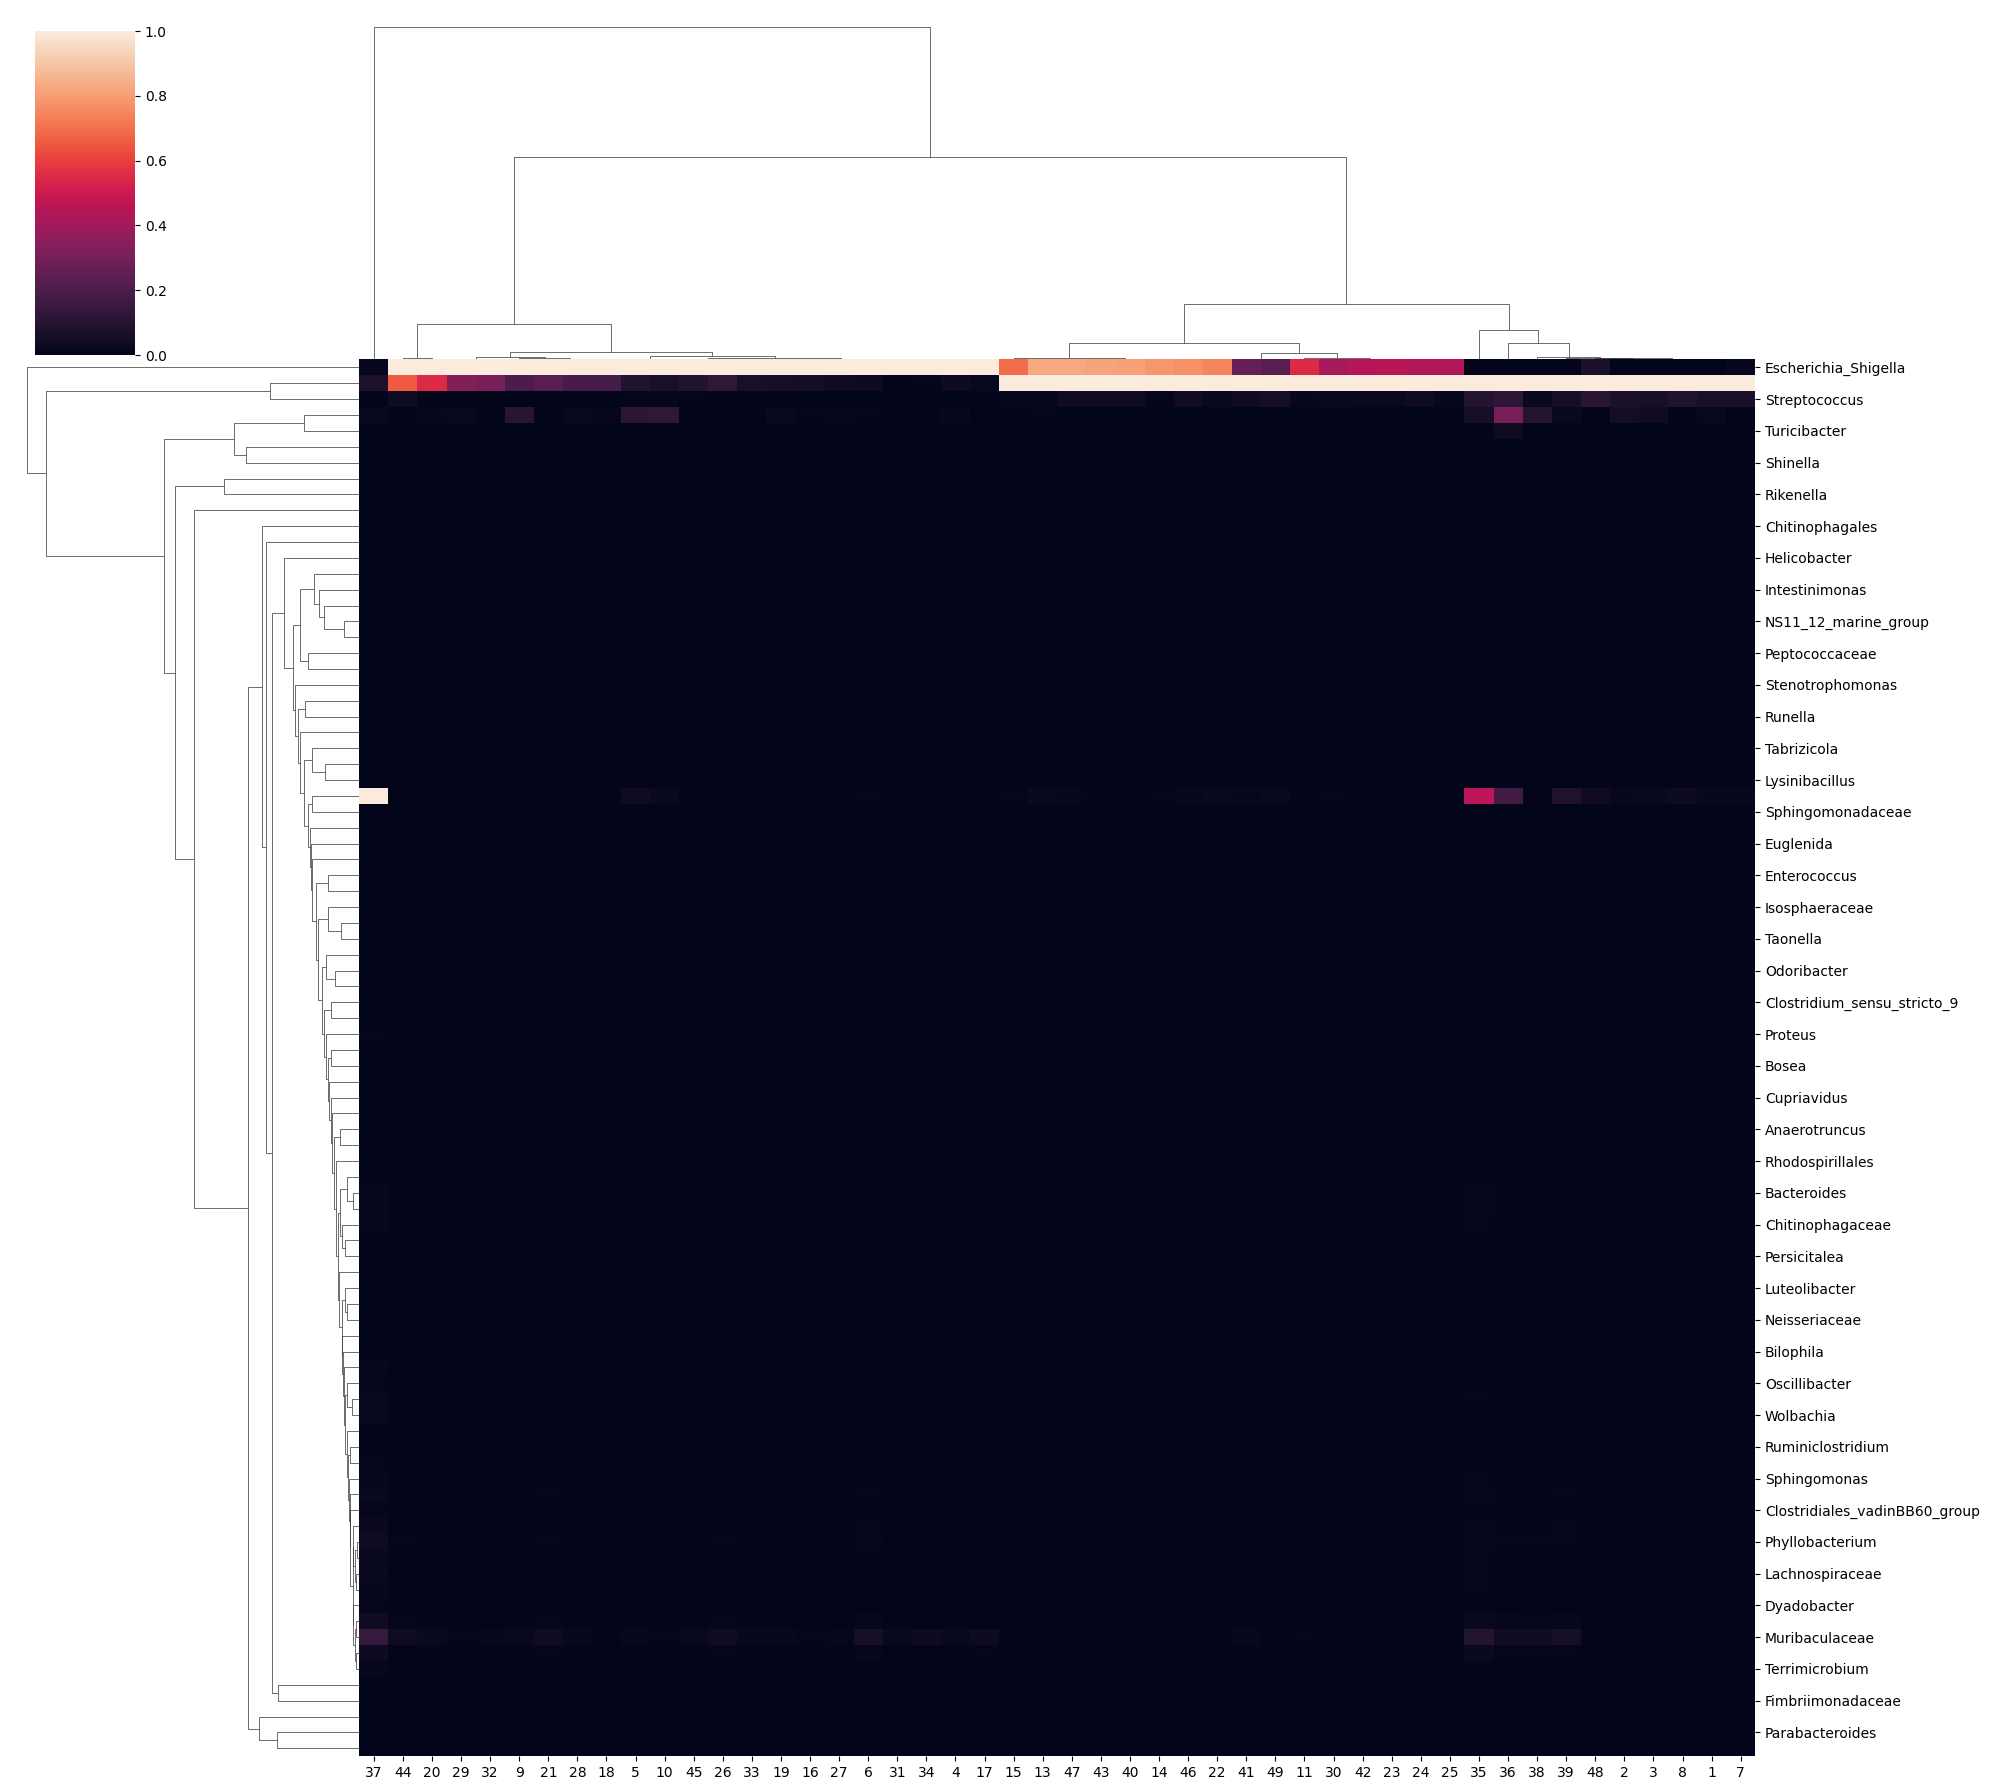

In [30]:
sns.clustermap(heatmap,
               metric="correlation",
               standard_scale=1,figsize=(20, 18))

In [31]:
color_dict=dict(zip(np.unique(metadata['Experiment']),np.array(['g','skyblue'])))
color_dict

{'C': 'g', 'F': 'skyblue'}

In [32]:
row_colors = metadata['Experiment'].map(color_dict)
row_colors

1           g
47          g
46          g
43          g
42          g
41          g
40          g
30          g
48          g
24          g
23          g
22          g
15          g
25          g
49          g
2           g
3           g
8           g
13          g
11          g
14          g
7           g
36    skyblue
37    skyblue
38    skyblue
5     skyblue
6     skyblue
4     skyblue
44    skyblue
45    skyblue
39    skyblue
35    skyblue
16    skyblue
33    skyblue
31    skyblue
29    skyblue
28    skyblue
27    skyblue
26    skyblue
9     skyblue
10    skyblue
21    skyblue
20    skyblue
19    skyblue
18    skyblue
17    skyblue
34    skyblue
32    skyblue
Name: Experiment, dtype: object

['C', 'F']


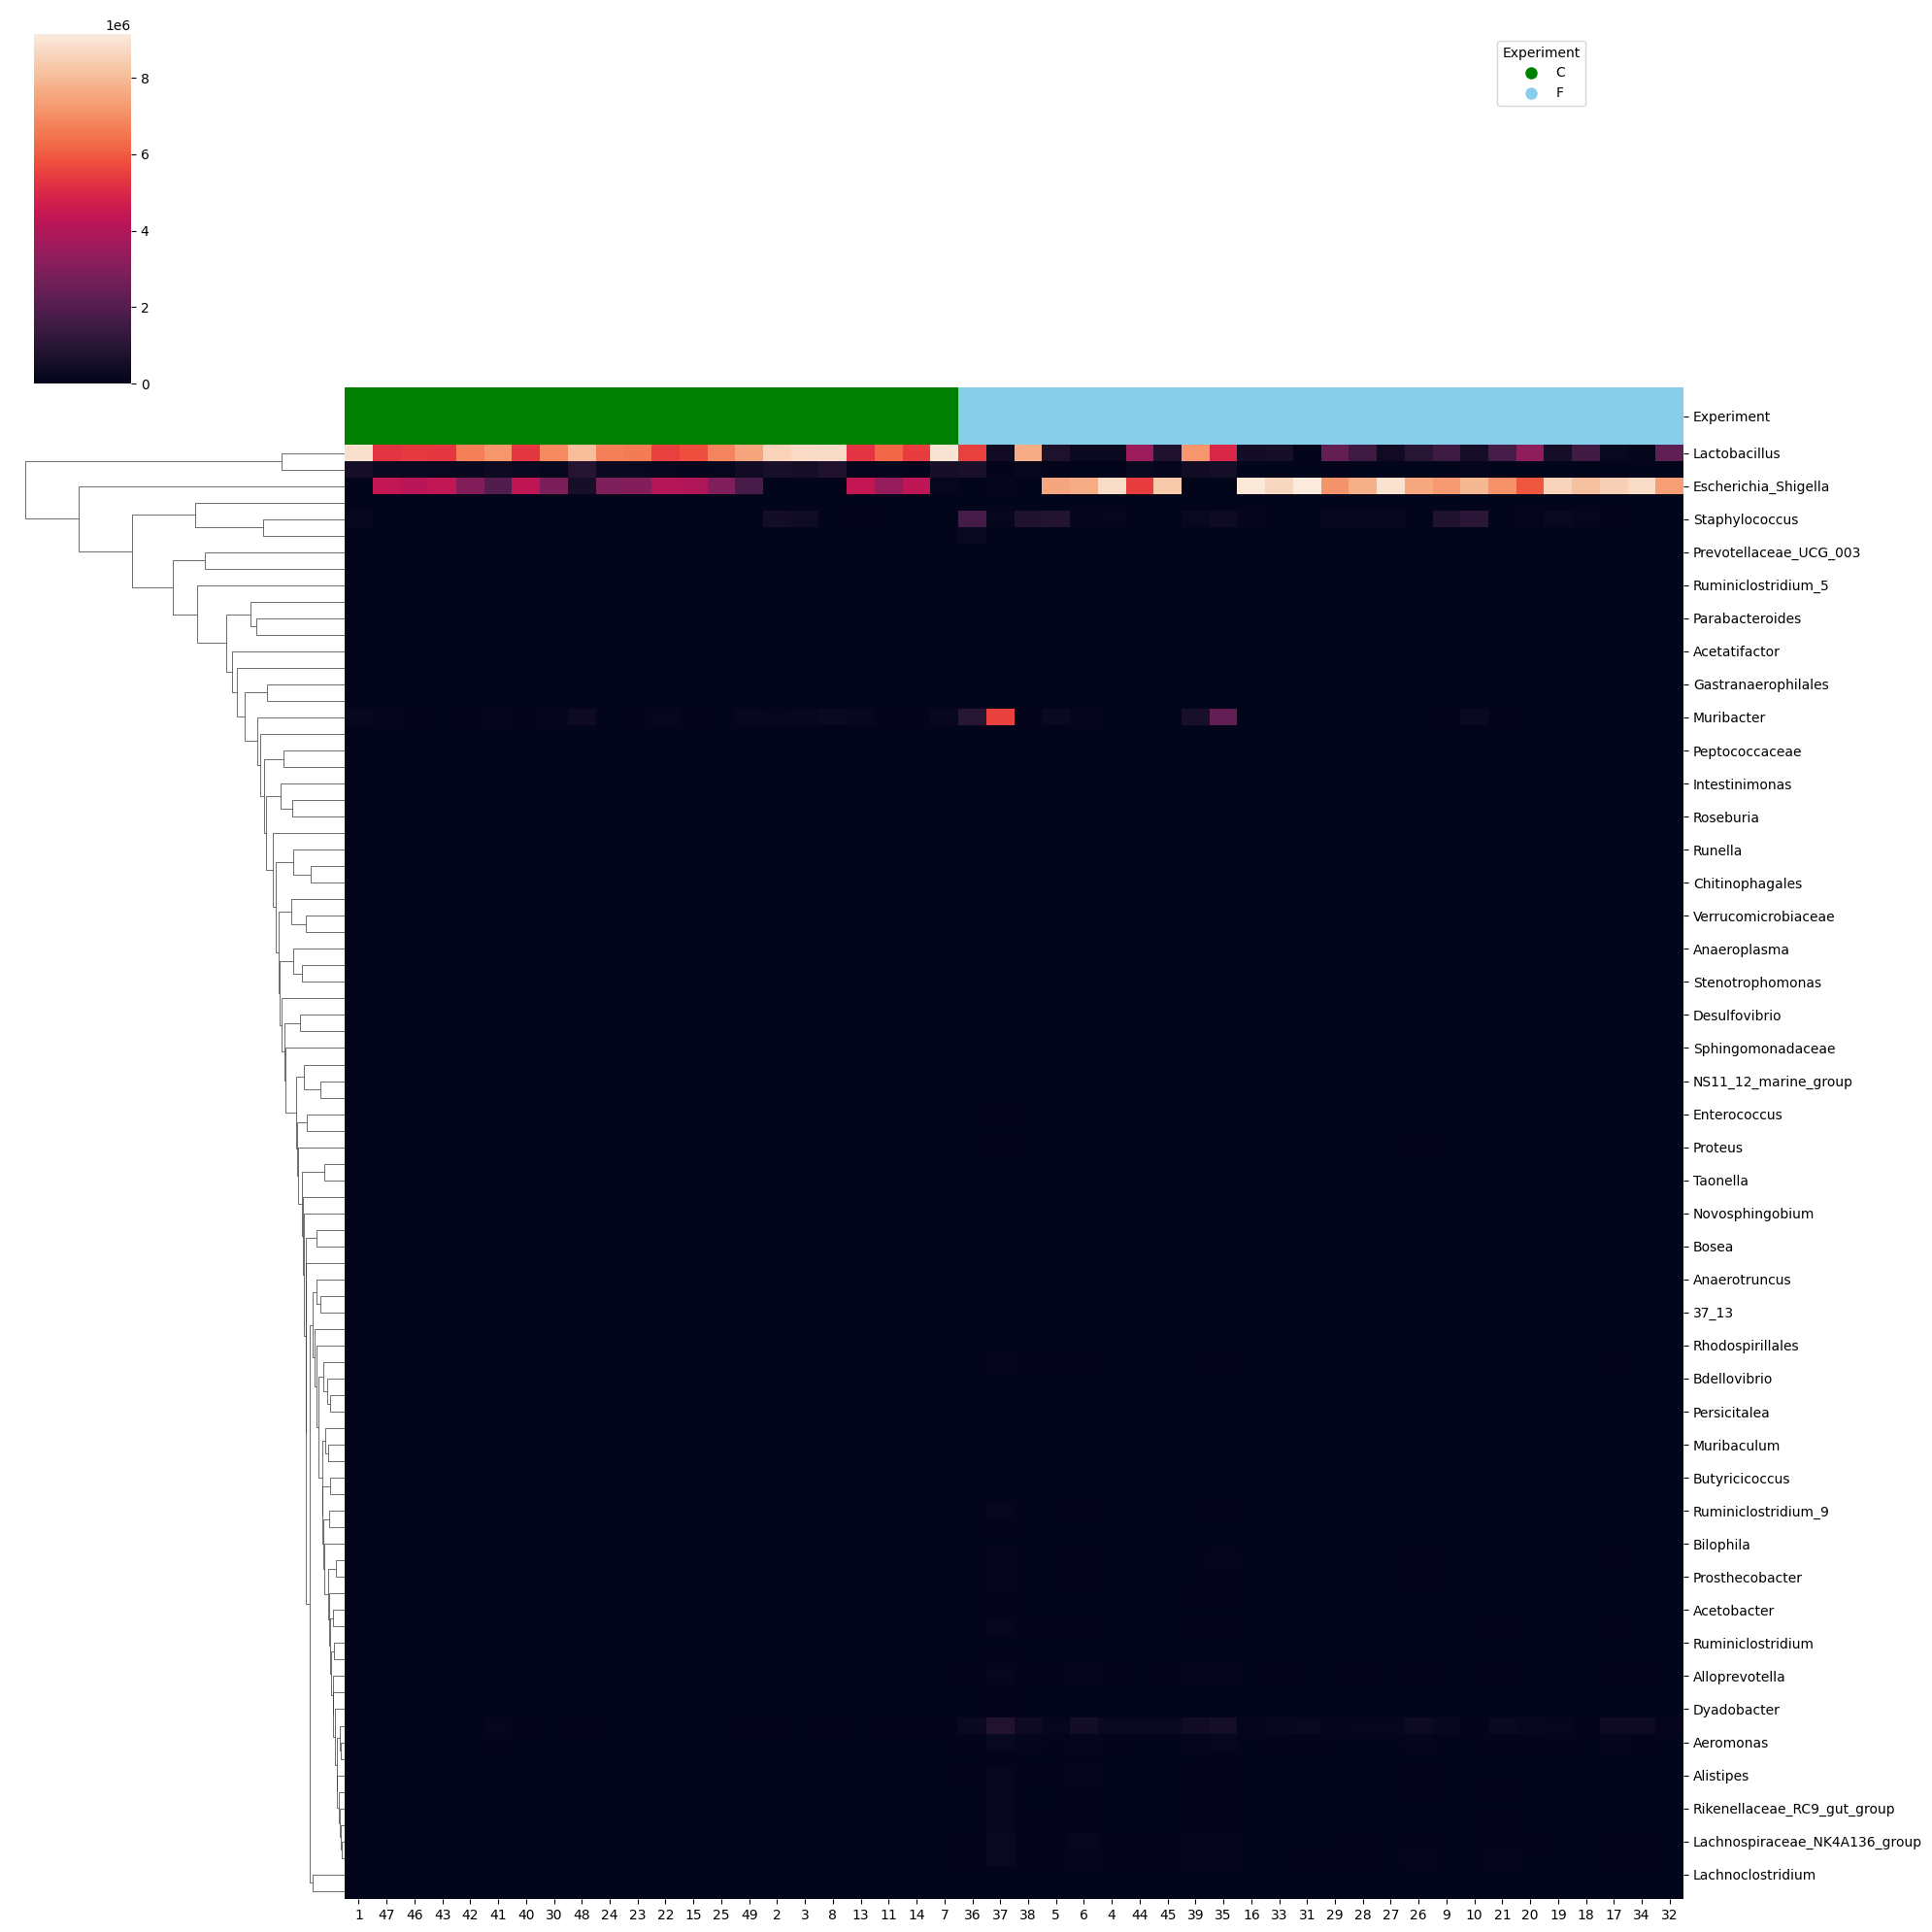

In [45]:

custom_cmap = sns.color_palette("OrRd", as_cmap=True)
sns.clustermap(heatmap,
               metric="correlation",
            #    standard_scale=1,
               col_colors=row_colors,
               col_cluster=False,
               # cmap="mako",
               # cbar_pos=(0, .2, .03, .4),
               figsize=(20, 15))
# Create a color legend using the color_dict
legend_labels = [f"{experiment}" for experiment, color in color_dict.items()]
print(legend_labels)
legend_colors = [color for _, color in color_dict.items()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels, legend_colors)]
plt.legend(handles=legend_handles, title="Experiment", bbox_to_anchor=(15, 1), loc='upper left')